In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [2]:
my_user = "PoojaK4414925"
my_pass = getpass.getpass()


········


In [3]:
search_item = "Dhoni"

In [4]:
from selenium import webdriver
#from selenium.webdriver.common.by import By
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
driver=webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login") 

In [5]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [6]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [7]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [8]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [9]:
all_tweets = list(all_tweets)
all_tweets[0]

'A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?'

In [10]:
import pandas as pd
pd.options.display.max_colwidth=1000

In [13]:
df=pd.DataFrame(all_tweets,columns=['tweets'])
df

,tweets
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni"
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni"
4,"The only real-time generative AI app for video chatting, live streaming, and video creation."
5,"Unpopular opinion\n\n""Ms dhoni at the age of 42 is better Option for ICT than Ishan kishan at 24"""
6,Okayy but this scene >>>\nAnd the way he talk about his pain!! \n#Barsatein
7,Odi Merchant that too home bully performer
8,#MSDhoni is the Most Tweeted Hashtag in India during the first half of 2023.\n\nUnmatched Fandom.
9,"Lowest Price Ever!\n\nASUS ROG Zephyrus G15(2022), 39.62 cms 2K WQHD 240Hz/3ms, AMD Ryzen 7 6800HS, 6GB RTX 3060, Gaming Laptop (16GB/1TB SSD/90WHrs Battery)\n\nPrice: ₹1,19,990\n\nLink: https://amzn.to/3Y3C01I?twclid=2-2ccec9brkrpfi2xzm3rftncfr\n\n165Hz Version is available at ₹1,14,990\n\nLink: https://amzn.to/3Y3o2g4?twclid=2-2ccec9brkrpfi2xzm3rftncfr"


In [12]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'The only real-time generative AI app for video chatting, live streaming, and video creation.'

In [14]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\POOJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\POOJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni"
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni"
4,"The only real-time generative AI app for video chatting, live streaming, and video creation."


In [17]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'The only real-time generative AI app for video chatting, live streaming, and video creation.'

In [18]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

nltk.download('vader_lexicon')

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+", "", tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+", "", cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(tweet)
    return sentiment_score['compound']

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    polarity = calPolarity(tweet)
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\POOJA\AppData\Roaming\nltk_data...


In [21]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['segmentation'] = df['cleanedTweets'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,segmentation
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?,A Tough question MSD fans choose Dhoni favourite cricketer Idol?,-0.1280,negative
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM,How many want see Yogi Babu play Chennai Super Kings? What think?,0.7882,positive
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni","""I grown watching movies. Even OTT era, I used watch movies YouTube. I huge fan."" - Sakshi Dhoni",0.3182,positive
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni","My First ever edit ""Thalaivan"" Hukum MSD",0.0000,neutral
4,"The only real-time generative AI app for video chatting, live streaming, and video creation.","The real-time generative AI app video chatting, live streaming, video creation.",0.2732,positive


In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('vader_lexicon')

#def TweetCleaning(tweet):
    # Your TweetCleaning function here

def calPolarity(tweet):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(tweet)
    return sentiment_score['compound']

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    polarity = calPolarity(tweet)
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

# Assuming you have a DataFrame named 'df' with a 'tweets' column
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['cleanedTweets'].apply(segmentation)
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\POOJA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?,A Tough question MSD fans choose Dhoni favourite cricketer Idol?,-0.1280,negative,0.833333
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM,How many want see Yogi Babu play Chennai Super Kings? What think?,0.7882,positive,0.583333
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni","""I grown watching movies. Even OTT era, I used watch movies YouTube. I huge fan."" - Sakshi Dhoni",0.3182,positive,0.900000
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni","My First ever edit ""Thalaivan"" Hukum MSD",0.0000,neutral,0.333333
4,"The only real-time generative AI app for video chatting, live streaming, and video creation.","The real-time generative AI app video chatting, live streaming, video creation.",0.2732,positive,0.500000


In [25]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'segmentation' column
pivot_table = df.pivot_table(index=['segmentation'], aggfunc={'segmentation':'count'})
pivot_table.columns = ['count']
pivot_table.reset_index(inplace=True)

print(pivot_table)

  segmentation  count
0     negative     14
1      neutral     17
2     positive     26


In [26]:
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
28,"Remember this Shoes, Which Thala Dhoni was spotted wearing few days back, Since then was waiting to get this Fabulous Pair of Shoes, Thank You \n@Asianfootwears\n for this wonderful Surprise !! \n\n#MSDhoni | #WhistlePodu | #Dhoni","Remember Shoes, Which Thala Dhoni spotted wearing days back, Since waiting get Fabulous Pair Shoes, Thank You wonderful Surprise !! | |",0.9059,positive,0.666667
13,Celebrating a remarkable milestone! Motilal Oswal Nifty 500 Index Fund soar past 500 crores in AUM! \n\n#motilaloswal #MotilalOswalAMC #Nifty500 #Investment #Milestone #IndexFunds,Celebrating remarkable milestone! Motilal Oswal Nifty 500 Index Fund soar past 500 crores AUM!,0.8906,positive,0.500000
10,"MS Dhoni & Last over, Better love story than Twilight..","MS Dhoni & Last over, Better love story Twilight..",0.7964,positive,0.388889


In [27]:
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
45,Some Brutal Hitting From Dhoni !\n\n#MSDhoni || \n@msdhoni,Some Brutal Hitting From Dhoni ! ||,-0.6588,negative,1.000000
18,But According To This Blud MS Dhoni Was Home Bully .,But According To This Blud MS Dhoni Was Home Bully .,-0.6486,negative,0.000000
23,"Ben Stokes: ""This is the first draw under me and I think it's CSK curse. He added, Dhoni was a Terrible test captain who used to play for draw everytime""","Ben Stokes: ""This first draw I think CSK curse. He added, Dhoni Terrible test captain used play draw everytime""",-0.6369,negative,0.666667


In [29]:
df[df.tPolarity==0]
df.head()

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?,A Tough question MSD fans choose Dhoni favourite cricketer Idol?,-0.1280,negative,0.833333
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM,How many want see Yogi Babu play Chennai Super Kings? What think?,0.7882,positive,0.583333
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni","""I grown watching movies. Even OTT era, I used watch movies YouTube. I huge fan."" - Sakshi Dhoni",0.3182,positive,0.900000
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni","My First ever edit ""Thalaivan"" Hukum MSD",0.0000,neutral,0.333333
4,"The only real-time generative AI app for video chatting, live streaming, and video creation.","The real-time generative AI app video chatting, live streaming, video creation.",0.2732,positive,0.500000


In [30]:
df.sort_values(by=['tSubjectivity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
54,Profound \n\nM S Dhoni |,Profound M S Dhoni |,0.0000,neutral,1.0
45,Some Brutal Hitting From Dhoni !\n\n#MSDhoni || \n@msdhoni,Some Brutal Hitting From Dhoni ! ||,-0.6588,negative,1.0
35,My all time favorite cricket players in a team. Your team?\n1. Sachin Tendulkar \n2. Virender Sehwag\n3. Virat Kohli\n4. Vivian Richards\n5. AB De Villiers\n6. Jacques Kallis \n7. MS Dhoni (C & WK) \n8. Wasim Akram\n9. Shane Warne\n10. Joel Garner\n11. Mutthiah Murlitharan,My time favorite cricket players team. Your team? 1. Sachin Tendulkar 2. Virender Sehwag 3. Virat Kohli 4. Vivian Richards 5. AB De Villiers 6. Jacques Kallis 7. MS Dhoni (C & WK) 8. Wasim Akram 9. Shane Warne 10. Joel Garner 11. Mutthiah Murlitharan,0.4588,positive,1.0


In [31]:
df.sort_values(by=['tSubjectivity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
56,"Episode 5 Part 2 of NatStrat Conversations: ""#Afghanistan and its Neighbours"". Adviser, NatStrat Shantanu Mukharji in conversation with Diplomatic Editor, The Hindu, Suhasini Haidar focus on Afghanistan's relations with Iran, China, India and other regional powers. #Taliban","Episode 5 Part 2 NatStrat Conversations: """". Adviser, NatStrat Shantanu Mukharji conversation Diplomatic Editor, The Hindu, Suhasini Haidar focus Afghanistan's relations Iran, China, India regional powers.",0.0000,neutral,0.0
42,He met dhoni before that match,He met dhoni match,0.0000,neutral,0.0
41,Everyone Loves MS Dhoni !!,Everyone Loves MS Dhoni !!,0.6467,positive,0.0


In [33]:
df[df.tSubjectivity==0]
df.head()

,tweets,cleanedTweets,tPolarity,segmentation,tSubjectivity
0,A Tough question to MSD fans why did you choose Dhoni as your favourite cricketer or your Idol?,A Tough question MSD fans choose Dhoni favourite cricketer Idol?,-0.1280,negative,0.833333
1,How many of you want to see Yogi Babu play for Chennai Super Kings? \nWhat do you think? \n@ChennaiIPL\n \n\n#28thJulyInTheatres #LGM,How many want see Yogi Babu play Chennai Super Kings? What think?,0.7882,positive,0.583333
2,"""I have grown up watching \n@AlluArjun\n movies. Even before the OTT era, I used to watch his movies on YouTube. I am his huge fan."" \n\n- Sakshi Dhoni at #LGM event in Hyderabad\n\n#WhistlePodu #MSDhoni \n@msdhoni","""I grown watching movies. Even OTT era, I used watch movies YouTube. I huge fan."" - Sakshi Dhoni",0.3182,positive,0.900000
3,"My First ever edit for my ""Thalaivan"" \n@msdhoni\n \nHukum MSD\n@anirudhofficial\n @Nelsondilpkumar\n @VigneshShivN\n @internetumpire\n \n#Hukum #Dhoni","My First ever edit ""Thalaivan"" Hukum MSD",0.0000,neutral,0.333333
4,"The only real-time generative AI app for video chatting, live streaming, and video creation.","The real-time generative AI app video chatting, live streaming, video creation.",0.2732,positive,0.500000


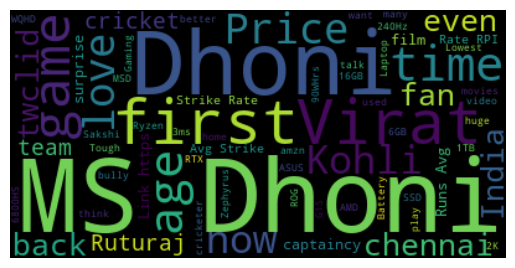

In [34]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
import seaborn as sns

In [36]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,14,14,14,14
neutral,17,17,17,17
positive,26,26,26,26


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

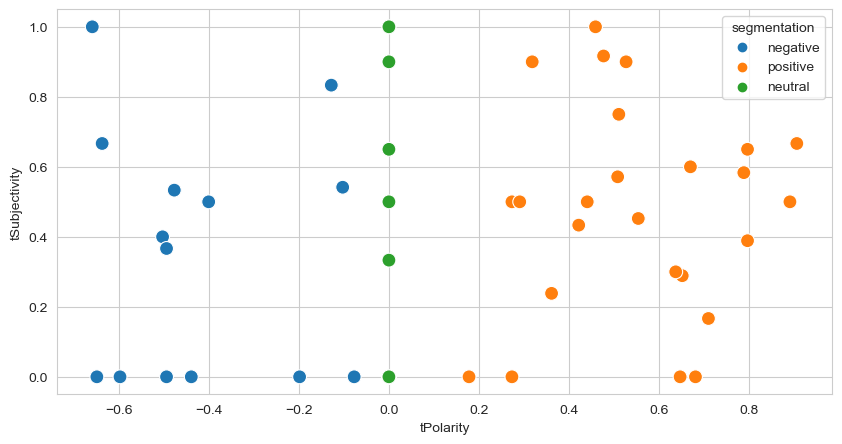

In [37]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

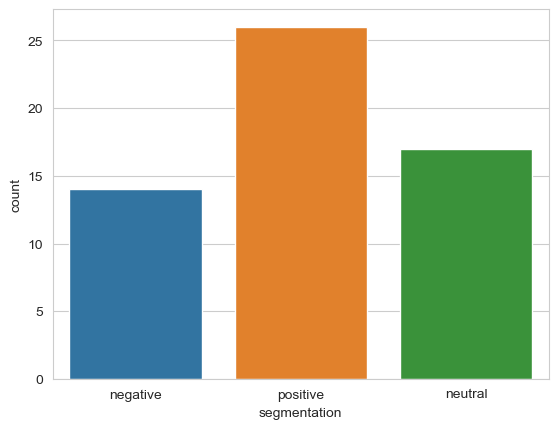

In [38]:
sns.countplot(data=df,x='segmentation')

In [39]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,45.6
1,mayLoose,24.6
2,notSure,29.8
